In [1]:
# IMPORT MODULES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from keras import models, regularizers, layers, optimizers, losses, metrics
from tensorflow.keras.optimizers import Adam

In [2]:
tf.random.set_seed(42)
np.random.seed(1337)

In [3]:
#Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Unzip folder and define data directory.
data_source = "/content/drive/MyDrive/Data_Visualization/Project/Data/Covid_Dataset.rar"
data_output = "/content"
!unrar x -Y $data_source $data_output

Streaming output truncated to the last 5000 lines.
Extracting  /content/Covid_Dataset/train/Normal/Normal_1077.png           50%  OK 
Extracting  /content/Covid_Dataset/train/Normal/Normal_10770.png          50%  OK 
Extracting  /content/Covid_Dataset/train/Normal/Normal_10771.png          50%  OK 
Extracting  /content/Covid_Dataset/train/Normal/Normal_10772.png          50%  OK 
Extracting  /content/Covid_Dataset/train/Normal/Normal_10773.png          50%  OK 
Extracting  /content/Covid_Dataset/train/Normal/Normal_10774.png          50%  OK 
Extracting  /content/Covid_Dataset/train/Normal/Normal_10775.png          50%  OK 
Extracting  /content/Covid_Dataset/train/Normal/Normal_10776.png          50%  OK 
Extracting  /content/Covid_Dataset/train/Normal/Normal_10778.png          50%  OK 
Extracting  /content/Covid_Dataset/train/Normal/Normal_10781.png          50%  OK 
Extracting  /content/Covid_Da

In [5]:
# Configurations
data_dir = "/content/Covid_Dataset"
classes = ['COVID', 'Normal']
batch_size = 32

In [6]:
# Read Test Data
test_path = data_dir + '//test'
test_batches = ImageDataGenerator(preprocessing_function = preprocess_input).flow_from_directory(directory=test_path, classes=classes, target_size=(224, 224), batch_size=batch_size, shuffle=False)

Found 1252 images belonging to 2 classes.


In [7]:
model = load_model("/content/drive/MyDrive/Data_Visualization/Project/Models/InceptionV3_0.0001_WD_0.5_32_V5.h5")

In [8]:
#Returns the loss value & metrics values for the model in test mode.
test_loss, test_accuracy = model.evaluate(test_batches)
test_accuracy = round(test_accuracy * 100,2)
test_loss = round(test_loss,2)
print(f'Testing Accuracy: {test_accuracy}%')
print(f'Testing Loss: {test_loss}')

40/40 [==============================] - 13s 99ms/step - loss: 0.0317 - accuracy: 0.9880
Testing Accuracy: 98.8%
Testing Loss: 0.03


In [9]:
#Define a function to use in plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [10]:
#Generates output predictions for the input samples.
predictions = model.predict(x=test_batches, verbose = 1)
predictions = np.argmax(predictions, axis=-1)

40/40 [==============================] - 5s 80ms/step


Confusion matrix, without normalization


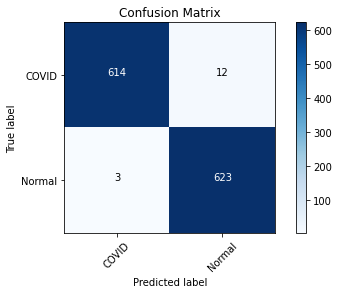

In [11]:
#Plot the confusion matrix 
cm = confusion_matrix(y_true = test_batches.classes, y_pred = predictions)
plot_confusion_matrix(cm=cm, classes=classes, title='Confusion Matrix')

In [12]:
C_N_FN = []
N_C_FP = []

for i in range(0,len(predictions)):
  if test_batches.classes[i] == predictions[i] == 0:
    continue
  elif test_batches.classes[i] == predictions[i] == 1:
    continue
  elif test_batches.classes[i] == 0 and predictions[i] == 1:
    C_N_FN.append(test_batches.filepaths[i])
  elif test_batches.classes[i] == 1 and predictions[i] == 0:
    N_C_FP.append(test_batches.filepaths[i])

In [13]:
C_N_FN

['/content/Covid_Dataset//test/COVID/Covid_1379.png',
 '/content/Covid_Dataset//test/COVID/Covid_1385.png',
 '/content/Covid_Dataset//test/COVID/Covid_2214.png',
 '/content/Covid_Dataset//test/COVID/Covid_2232.png',
 '/content/Covid_Dataset//test/COVID/Covid_2557.png',
 '/content/Covid_Dataset//test/COVID/Covid_2700.png',
 '/content/Covid_Dataset//test/COVID/Covid_2990.png',
 '/content/Covid_Dataset//test/COVID/Covid_3439.png',
 '/content/Covid_Dataset//test/COVID/Covid_3662.png',
 '/content/Covid_Dataset//test/COVID/Covid_3867.png',
 '/content/Covid_Dataset//test/COVID/Covid_634.png',
 '/content/Covid_Dataset//test/COVID/Covid_878.png']

In [14]:
N_C_FP

['/content/Covid_Dataset//test/Normal/Normal_3265.png',
 '/content/Covid_Dataset//test/Normal/Normal_3824.png',
 '/content/Covid_Dataset//test/Normal/Normal_8793.png']